In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib notebook
mpl.style.use(r"\\fil-ask-004\python\mplstyle\4subsea.mplstyle")

In [2]:
import datareservoirio as drio

In [3]:
drio.globalsettings.environment.set_test()  # Work with test environment

# Create series data
The `datareservoirio` work with Pandas Series object. Let's create a dummy series. 

In [4]:
index = pd.date_range("2016-01-03 00:00:00", freq="min", periods=100)
series_dummy = pd.Series(20.0 + np.random.randn(100), index=index)
series_dummy.name = "Temp"

In [5]:
series_dummy.head()

2016-01-03 00:00:00    19.731047
2016-01-03 00:01:00    19.322152
2016-01-03 00:02:00    18.885401
2016-01-03 00:03:00    19.210741
2016-01-03 00:04:00    19.320680
Freq: T, Name: Temp, dtype: float64

# Upload to the reservoir

First, authenticate yourself towards the reservoir.

In [6]:
auth_key = drio.Authenticator("reservoir-integrationtest@4subsea.com")

Password: ········


Then initiate a client and use the authentication key.

In [7]:
client = drio.Client(auth_key)

Upload the Series and store the response from the reservoir.

In [8]:
response = client.create(series_dummy)

In [9]:
response

{u'FileId': u'83559335-6eae-4cc5-bc0d-5239a3d778c0',
 u'TimeOfFirstSample': 1451779200000000000L,
 u'TimeOfLastSample': 1451785140000000000L,
 u'TimeSeriesId': u'5a57ec52-2559-4ad5-b292-5f5e48daab9a'}

The reservoir assigns a unique id - TimeSeriesId. This id can be used to make requests towards the reservoir.

# Series information

Lets ask the reservoir about the newly created series data.

In [10]:
info = client.info(response["TimeSeriesId"])

In [11]:
info

{u'Created': u'2017-06-14T16:37:07.7145329+00:00',
 u'CreatedByEmail': u'reservoir-integrationtest@4subsea.com',
 u'LastModified': u'2017-06-14T16:37:07.7145329+00:00',
 u'LastModifiedByEmail': u'reservoir-integrationtest@4subsea.com',
 u'Metadata': [],
 u'TimeOfFirstSample': 1451779200000000000L,
 u'TimeOfLastSample': 1451785140000000000L,
 u'TimeSeriesId': u'5a57ec52-2559-4ad5-b292-5f5e48daab9a'}

Note that the `TimeOfFirstSample` and `TimeOfLastSample` is stored as nanoseconds since POSIX epoch.

# Append more data

You can always append more data to the same timeseries entry. The data may even overlap, which in that case the most recent entry overwrites.

In [12]:
index = pd.date_range("2016-01-03 00:00:50", freq="min", periods=100)
series_dummy_append = pd.Series(23.0 + np.random.randn(100), index=index)
series_dummy_append.name = "Temp"

In [13]:
client.append(series_dummy_append, response["TimeSeriesId"])

{u'FileId': u'3e08803a-2763-4906-a53c-de614a5d62f2',
 u'TimeOfFirstSample': 1451779250000000000L,
 u'TimeOfLastSample': 1451785190000000000L,
 u'TimeSeriesId': u'5a57ec52-2559-4ad5-b292-5f5e48daab9a'}

# Retrieve data back from the reservoir
You can download data from the reservoir. Data is presented as Pandas Series object. The index is by default kept as integers.

In [14]:
data = client.get(response["TimeSeriesId"])

In [15]:
data.head()

index
1451779200000000000    19.731047
1451779250000000000    21.646486
1451779260000000000    19.322152
1451779310000000000    23.306421
1451779320000000000    18.885401
Name: values, dtype: float64

But the index can be converted to date-time if desired.

In [16]:
data_datetime = client.get(response["TimeSeriesId"], convert_date=True)

In [17]:
data_datetime.head()

index
2016-01-03 00:00:00    19.731047
2016-01-03 00:00:50    21.646486
2016-01-03 00:01:00    19.322152
2016-01-03 00:01:50    23.306421
2016-01-03 00:02:00    18.885401
Name: values, dtype: float64

## Work with data

<IPython.core.display.Javascript object>


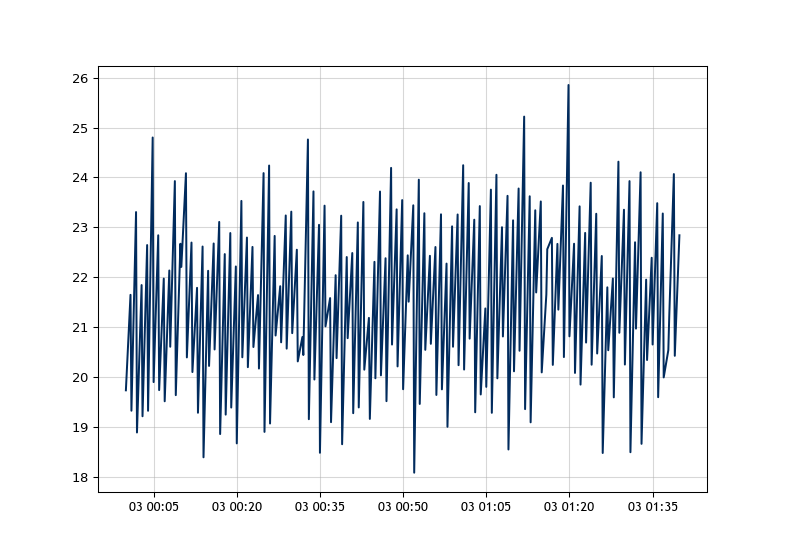

In [18]:
plt.figure()
plt.plot(data_datetime)

# Delete data in the reservoir

In [19]:
client.delete(response["TimeSeriesId"])